In [2]:
# -*- coding: utf-8 -*-
# import
#from rtdtional import *
import receiving_n_transforming_data as rtd
import dimensionality_reduction as drf
import classification as cls
print(rtd.func_list__)

['train_test_split', 'classification_report', 'confusion_matrix', 'accuracy_score', 'read_data_xlsx', 'lemmatize', 'del_stop_words', 'document_term_matrix', 'choce_from_data', 'reshape_testdata']


In [4]:
data = rtd.read_data_xlsx("data.xlsx")
name_tf_idf, annotation_tf_idf, labels = rtd.choce_from_data(data=data, tf_idf=True)     # Получение tf-idf матрицы для названий и аннотаций
# name_tf_idf, annotation_tf_idf    - списки [матрица документ-термин, термины]
# name_tf_idf = name_tf_idf[0]
# annotation_tf_idf = annotation_tf_idf[0]

In [4]:
# Проверяем сбалансированность выборки
print("Количество текстов по теме ИАД", labels.count(True))
print("Количество текстов по теме не ИАД", labels.count(False))

Количество текстов по теме ИАД 1583
Количество текстов по теме не ИАД 1836


In [53]:
from sklearn.model_selection import train_test_split

file = open("Классификация без удаления малозначимых терминов.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf[0], labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test)
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

In [5]:
df_name_tf_idf_short = drf.dimensionality_reduction_func(name_tf_idf)
df_annotation_tf_idf_short = drf.dimensionality_reduction_func(annotation_tf_idf)
name_tf_idf_short, terms = drf.df_to_list(df_name_tf_idf_short)
annotation_tf_idf_short = drf.df_to_list(df_annotation_tf_idf_short)[0]
del df_name_tf_idf_short, df_annotation_tf_idf_short

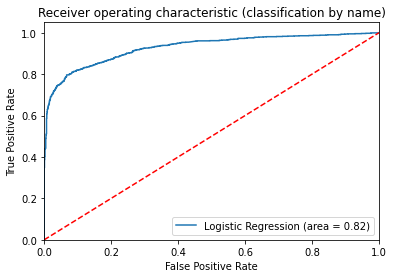

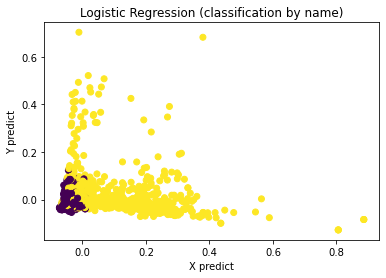

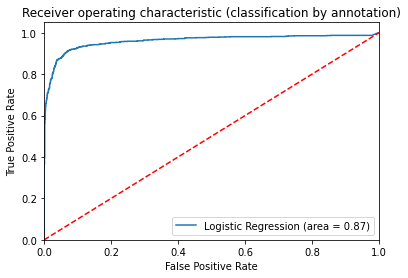

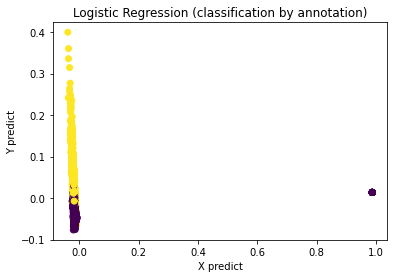

In [9]:
# Классификация c логистической регрессией с удалением малозначимых терминов// с графиками

from sklearn.model_selection import train_test_split

file = open("Классификация с удалением малозначимых терминов ТЕСТ.txt", 'w', encoding='utf-8')

x_train, x_test, y_train, y_test = train_test_split(name_tf_idf_short, labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test, "(classification by name)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

x_train, x_test, y_train, y_test = train_test_split(annotation_tf_idf_short, labels, train_size=0.3, random_state=0)
test_pred, test_score, confusionMatrix, classificationReport = cls.logistic_regression(x_train, x_test, y_train, y_test, "(classification by annotation)")
# print("Результаты классификации:", test_pred, "Точность:", test_score, "Матрица ошибок:", confusionMatrix, "Отчет классификации:", classificationReport, sep='\n')
file.write("Результаты классификации:\n" + str(test_pred) + "\nТочность:\n" + str(test_score) + "\nМатрица ошибок:\n" + str(confusionMatrix) + "\nОтчет классификации:\n" + str(classificationReport))

file.close()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA

def k_nearest_neighbors(X_train, X_test, Y_train, Y_test):  # k ближайших соседей
    """Алгоритм k-ближайших соседей
    X_train - обучающая выборка
    X_test - тестовая выборка
    Y_train - метки обучающей выборки
    Y_test - метки тестовой выборки
    Возвращает classification_report и confusion_matrix
    """
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, Y_train)
    Y = neigh.predict(X_test)
    #print("classification_report", classification_report(Y_test, Y), sep='\n')
    #print("confusion_matrix", confusion_matrix(Y_test, Y), sep='\n')
    # model_2 = PCA(n_components=2, random_state=0)
    # x_reduced_2 = model_2.fit_transform(X_test)
    # fig = plt.figure()
    # plt.scatter(x_reduced_2[:, 0], x_reduced_2[:, 1], c=Y)
    # plt.title('x test, y predict K-ближайших соседей')
    return classification_report(Y_test, Y), confusion_matrix(Y_test, Y)#, fig